This notebook is to investigate the issue of no buildings being built in some large areas starting in 2023 or so.

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
run22 = pd.read_csv('run22_total.csv', index_col=0)

In [11]:
store = pd.HDFStore('./../runs/run22.h5')
parcels_lid = store['base/parcels'][['large_area_id']]

In [12]:
res = pd.DataFrame(index=parcels_lid.large_area_id.unique())
nonres = pd.DataFrame(index=parcels_lid.large_area_id.unique())
for year in range(2016, 2046):
    buildings_name = '{}/buildings'.format(year)
    buildings = store[buildings_name]
    b = buildings[['sqft_price_res', 'sqft_price_nonres', 'parcel_id']]
    b = b.merge(parcels_lid, left_on='parcel_id', right_index=True)
    bylid = b.groupby('large_area_id').mean()
    res[year] = bylid['sqft_price_res']
    nonres[year] = bylid['sqft_price_nonres']

In [14]:
res

,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,...,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045
5,19.554842,19.376086,19.150407,18.905096,18.623410,18.329081,18.028133,17.788887,17.599397,17.450082,...,16.006833,15.912608,15.841656,15.763197,15.687899,15.577496,15.495998,15.469347,15.468972,15.361342
3,59.295957,59.115265,60.005192,61.651336,64.774440,64.625637,66.290889,67.462217,68.539547,67.626554,...,69.035635,69.060775,68.843089,69.715693,69.816859,69.873896,69.161186,70.065951,69.295384,69.956866
125,121.366831,124.421009,126.814133,130.802287,129.468563,130.335356,131.859284,133.298762,132.724893,134.269977,...,133.976779,132.337806,133.544972,133.017504,133.305147,133.602870,132.716345,131.687095,132.113800,132.532681
99,91.051112,91.586556,86.502476,86.727315,85.670092,84.214765,84.101593,84.688639,84.843730,86.554339,...,81.786090,81.939750,81.520080,81.587191,80.167474,81.599202,81.547103,79.851294,79.427846,79.696869
161,114.616931,115.051202,116.589674,117.051795,116.691158,113.209800,110.247059,106.412577,105.499225,103.299515,...,90.167387,88.484121,90.141030,89.577129,88.536298,88.067880,86.934755,86.609508,87.482362,86.252330
115,17.633525,15.515450,15.558074,15.791701,21.229964,19.107723,19.796822,16.720078,18.049837,21.776685,...,23.557596,23.561701,22.613933,19.619378,22.690788,21.439488,19.175979,22.796630,18.758735,18.838266
147,57.629654,55.876348,55.438201,54.947356,56.098197,56.115459,56.856302,56.596513,57.914320,55.032948,...,52.150829,52.290355,51.873613,52.142696,51.566332,51.361455,51.448969,51.057364,51.047642,50.854406
93,104.111561,101.780503,101.240801,100.409150,112.742856,104.088080,109.783876,107.109507,113.379289,109.647127,...,109.544872,104.563281,109.587545,104.703739,110.578623,104.155045,110.751085,105.311146,107.805619,105.940179


In [15]:
nonres

,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,...,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045
5,9.685189,9.697500,9.736689,9.771766,9.815488,9.872028,10.024831,10.170642,10.290146,10.373191,...,11.461726,11.603786,11.787908,12.017754,12.235101,12.389633,12.527609,12.640361,12.760146,12.858122
3,26.071787,26.022079,26.036785,26.108332,26.043753,26.137998,26.226393,26.282254,26.344773,26.367895,...,26.628709,26.660863,26.696968,26.740671,26.793924,26.826149,26.852906,26.862078,26.870653,26.874174
125,26.167327,26.603342,27.058554,27.592814,27.843930,28.433734,28.951680,29.371693,29.664368,29.886284,...,30.981418,31.100909,31.207929,31.298570,31.494242,31.620484,31.732605,31.855119,31.984162,32.195013
99,22.679308,22.845234,23.098601,23.385707,23.306918,23.689004,24.079899,24.538537,24.970807,25.376406,...,29.472789,29.668371,29.872408,30.042938,30.207132,30.387838,30.591103,30.798003,30.961604,31.146020
161,38.010139,38.165445,38.304217,38.539387,38.688880,38.908157,38.997081,39.297057,39.449188,39.826424,...,42.125891,42.304230,42.507257,42.696650,42.791422,43.015589,43.094959,43.219048,43.313728,43.421865
115,26.992088,27.463940,27.827225,28.239721,28.579140,29.271064,29.842380,30.295828,30.821532,31.493057,...,34.584508,34.756223,34.898568,35.114499,35.103389,35.195379,35.239234,35.295556,35.461589,35.471018
147,30.685877,31.621716,31.709714,31.980745,32.247974,32.481905,32.644798,32.656009,32.717976,32.812365,...,34.117409,34.177064,34.230594,34.277804,34.314028,34.349829,34.359812,34.370487,34.392394,34.402586
93,30.415422,30.488025,30.630301,30.772230,30.337560,30.375327,30.463043,30.557558,30.669749,30.789743,...,35.174469,35.772708,36.353332,36.778389,37.075674,37.315000,37.594461,37.935932,38.256150,38.581031


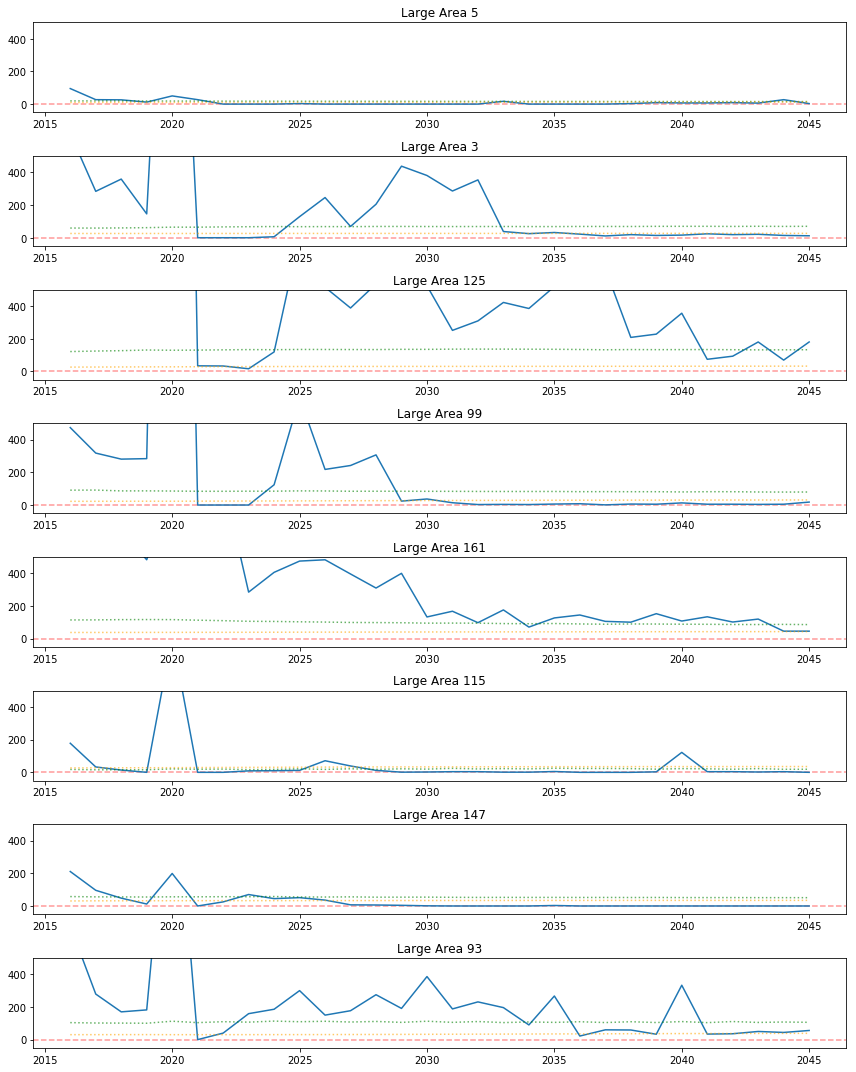

In [18]:
figure, axes_list = plt.subplots(len(run22), 1, figsize=(12, 15))
for i, ax in enumerate(axes_list):
    row = run22.fillna(0).iloc[i]
    ax.set_title('Large Area {}'.format(row.name))
    ax.axhline(y=0, color='red', alpha=0.4, linestyle='dashed')
    ax.set_ylim(bottom=-50, top=500)
    ax.plot(row.index, row.values)
    
    res_prices = res.fillna(0).iloc[i]
    nonres_prices = nonres.fillna(0).iloc[i]
    ax.plot(res_prices.index, res_prices.values, color='green', alpha=0.6, linestyle='dotted')
    ax.plot(nonres_prices.index, nonres_prices.values, color='orange', alpha=0.6, linestyle='dotted')
    
figure.tight_layout()

In [2]:
store29 = pd.HDFStore('./../runs/run29.h5')
parcels_lid = store29['base/parcels'][['large_area_id']]

In [5]:
store29

<class 'pandas.io.pytables.HDFStore'>
File path: ./../runs/run29.h5
/2016/buildings                                             frame        (shape->[2397034,11])
/2016/dropped_buildings                                     frame        (shape->[8362,12])   
/2016/feasibility                                           frame                             
/2016/households                                            frame        (shape->[1875551,8]) 
/2016/jobs                                                  frame        (shape->[1,4])       
/2016/parcels                                               frame        (shape->[1794449,15])
/2016/persons                                               frame        (shape->[4653065,7]) 
/2017/buildings                                             frame        (shape->[2398758,11])
/2017/dropped_buildings                                     frame        (shape->[9364,12])   
/2017/feasibility                                           frame            

In [9]:
f37 = store29['2037/feasibility']['residential'].dropna()

In [24]:
# CHECK LENGTH OF FEASIBILITY TABLE
# This would tell us whether zoning is preventing development

# Residential

feas = pd.DataFrame(index=parcels_lid.large_area_id.unique())
for year in range(2016, 2046):
    feasibility_name = '{}/feasibility'.format(year)
    feasibility = store29[feasibility_name]['residential'].dropna()
    f = feasibility.merge(parcels_lid, left_index=True, right_index=True)
    bylid = f.groupby('large_area_id').size()
    feas[year] = bylid

In [25]:
feas

,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,...,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045
5,2,NaN,10,NaN,NaN,NaN,NaN,2,4,4,...,12,12,12,12,12,12,12,12,12,12
3,3096,3148.0,3301,3706.0,4067.0,4307.0,4355.0,4402,4451,4534,...,2231,2251,2280,2301,2292,2298,2304,2320,2305,2311
125,19589,20015.0,20404,21257.0,21045.0,21178.0,20924.0,21259,21446,21800,...,15705,15630,15005,14740,14375,14212,14197,14060,14025,13696
99,2824,2558.0,2156,1792.0,1398.0,1282.0,1246.0,1265,1287,1195,...,216,214,225,220,224,212,214,212,213,215
161,6754,6333.0,6225,6546.0,6366.0,5748.0,5362.0,5117,4464,3970,...,1175,1174,1128,1138,1081,1089,1072,1052,1031,1023
115,78,119.0,143,182.0,232.0,217.0,230.0,243,250,174,...,106,81,127,82,125,133,124,108,144,110
147,483,408.0,391,366.0,369.0,355.0,360.0,347,374,266,...,26,25,25,29,23,24,25,23,26,26
93,5768,5047.0,4718,4736.0,4782.0,4785.0,4703.0,4374,3983,3752,...,1272,1275,1271,1280,1267,1270,1268,1270,1258,1262


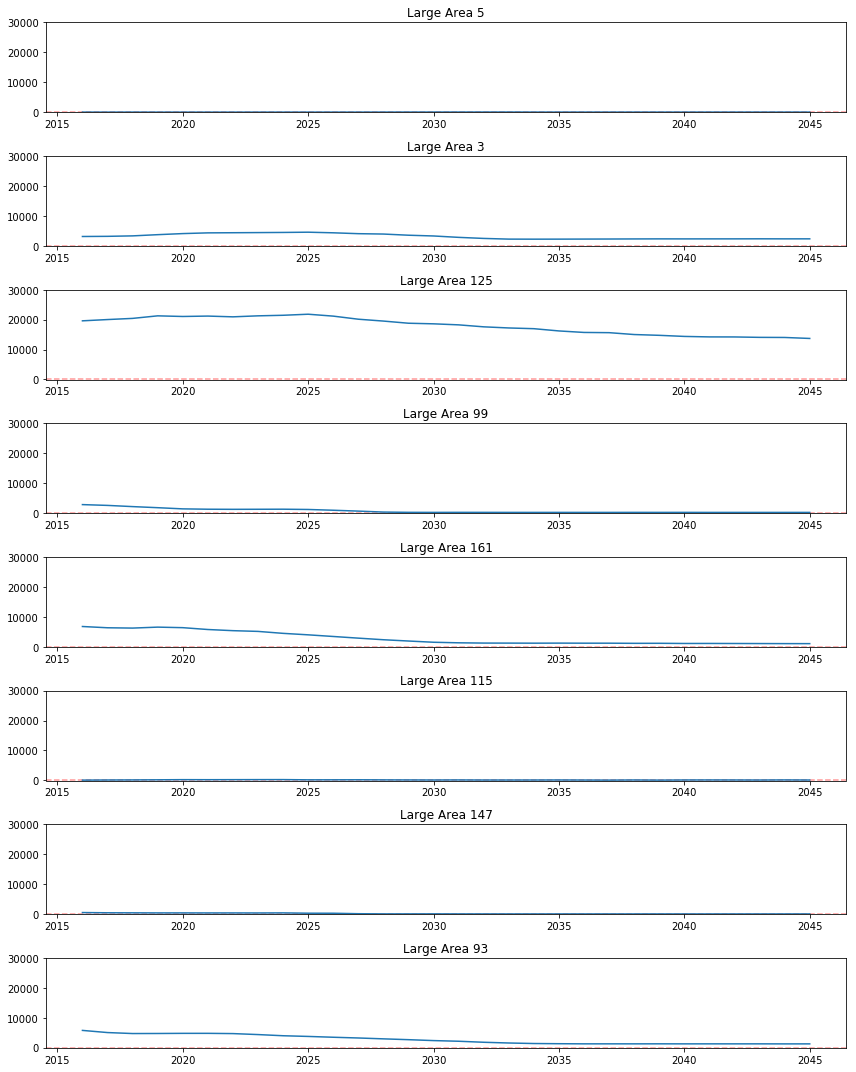

In [30]:
figure, axes_list = plt.subplots(len(feas), 1, figsize=(12, 15))
for i, ax in enumerate(axes_list):
    row = feas.fillna(0).iloc[i]
    ax.set_title('Large Area {}'.format(row.name))
    ax.axhline(y=0, color='red', alpha=0.4, linestyle='dashed')
    ax.set_ylim(bottom=-50, top=30000)
    ax.plot(row.index, row.values)
figure.tight_layout()

### Comparing table from within developer model to feasibility output

In [10]:
dev = pd.read_csv('./res_dev_table_lid3.csv', index_col=0)

In [19]:
dev.sort_index().head()

,parking_config,building_cost,building_revenue,building_sqft,construction_time,financing_cost,max_profit,max_profit_far,parking_ratio,stories,total_cost,residential_sqft,non_residential_sqft,ave_unit_size,parcel_size,current_units,residential_units,job_spaces,net_units
parcel_id,,,,,,,,,,,,,,,,,,,
1011934,surface,443620.800,463703.489319,3888.00,12.0,15526.728000,4555.961319,0.25,0.0,1.0,459147.528000,3304.8000,0.0,1814.268311,15552,0.0,2.0,0.0,2.0
1012048,surface,216162.450,225948.112272,1894.50,12.0,7565.685750,2219.976522,0.25,0.0,1.0,223728.135750,1610.3250,0.0,1814.268311,7578,0.0,1.0,0.0,1.0
1014617,surface,240408.700,266400.314551,2107.00,12.0,8414.304500,17577.310051,0.25,0.0,1.0,248823.004500,1790.9500,0.0,2574.521729,8428,0.0,1.0,0.0,1.0
1018726,surface,296545.900,307744.242503,2599.00,12.0,10379.106500,819.236003,0.25,0.0,1.0,306925.006500,2209.1500,0.0,2208.625000,10396,0.0,1.0,0.0,1.0
1019426,surface,557292.925,579526.994495,4884.25,12.0,19505.252375,2728.817120,0.25,0.0,1.0,576798.177375,4151.6125,0.0,2189.954590,19537,1.0,2.0,0.0,1.0


In [37]:
len(dev)

679

In [35]:
sum([(i in feas.index) for i in dev.index])

263

In [34]:
feas = store29['2035/feasibility']['residential']
feas = feas.merge(parcels_lid, left_index=True, right_index=True)
feas = feas.loc[feas.large_area_id == 3]

In [40]:
sum([(i in parcels_lid.loc[parcels_lid.large_area_id == 3].index) for i in dev.index])

679

In [36]:
len(feas)

202176

In [18]:
feas = feas.dropna(subset=['max_profit'])
feas.sort_index()

,non_residential_sqft,parking_config,financing_cost,building_sqft,stories,total_cost,max_profit,building_cost,max_profit_far,construction_time,building_revenue,parking_ratio,residential_sqft,large_area_id
parcel_id,,,,,,,,,,,,,,
1007005,0.0,surface,2016.717500,505.00,1.0,59637.217500,3264.701277,57620.500,0.250,12.0,6.290192e+04,0.0,429.2500,3
1007446,0.0,surface,2760.506875,691.25,1.0,81632.131875,151560.662198,78871.625,0.250,12.0,2.331928e+05,0.0,587.5625,3
1007451,0.0,surface,2224.379500,557.00,1.0,65778.079500,122125.553482,63553.700,0.250,12.0,1.879036e+05,0.0,473.4500,3
1007554,0.0,surface,8548.086750,2140.50,1.0,252779.136750,35003.198880,244231.050,0.250,12.0,2.877823e+05,0.0,1819.4250,3
1007584,0.0,surface,23965.133938,3292.75,1.0,708683.246463,9658.709300,375702.775,0.250,12.0,7.183420e+05,0.0,2798.8375,3
1007600,0.0,surface,24540.253209,3427.25,1.0,725690.344909,27121.501829,391049.225,0.250,12.0,7.528118e+05,0.0,2913.1625,3
1007658,0.0,surface,33173.585923,2952.50,1.0,980990.326585,29037.005679,336880.250,0.250,12.0,1.010027e+06,0.0,2509.6250,3
1007660,0.0,surface,29184.058148,2688.50,1.0,863014.290961,22632.022284,306757.850,0.250,12.0,8.856463e+05,0.0,2285.2250,3
1008296,0.0,surface,30438.574038,3051.65,1.0,900112.117968,3474.387856,348193.265,0.175,12.0,9.035865e+05,0.0,2593.9025,3
